# Diabetics Prediction

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Db=pd.read_csv("diabetes.csv")

# Analyse the dataset

In [4]:
Db.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
Db.shape

(2000, 9)

In [7]:
Db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
Db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [10]:
Db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
Db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Data Cleaning

In [13]:
# Returns true for a column having null values, else false
Db.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [24]:
Db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=Db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [25]:
Db.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

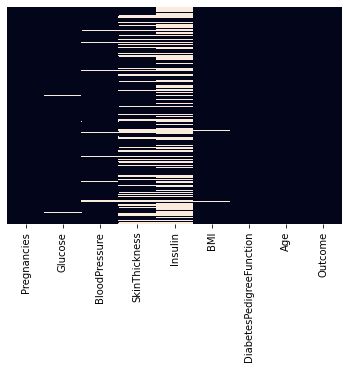

In [27]:
sns.heatmap(Db.isnull(),yticklabels=False,cbar=False)

In [28]:
Db['Glucose'].fillna(Db['Glucose'].mean(),inplace=True)
Db['BloodPressure'].fillna(Db['BloodPressure'].mean(),inplace=True)
Db['SkinThickness'].fillna(Db['SkinThickness'].mean(),inplace=True)
Db['Insulin'].fillna(Db['Insulin'].mean(),inplace=True)
Db['BMI'].fillna(Db['BMI'].mean(),inplace=True)

In [29]:
Db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

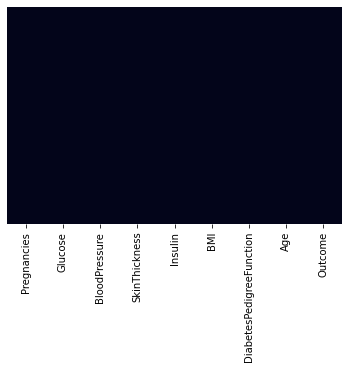

In [33]:
sns.heatmap(Db.isnull(),yticklabels=False,cbar=False)

# Visualization

0    1316
1     684
Name: Outcome, dtype: int64

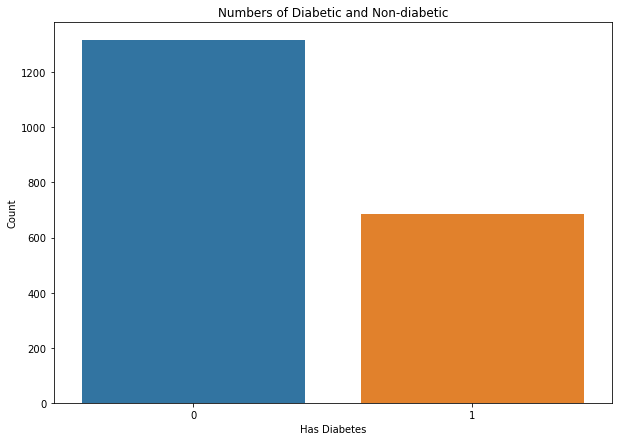

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=Db)
plt.title("Numbers of Diabetic and Non-diabetic")
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

Db["Outcome"].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B958B62940>,
      dtype=object)

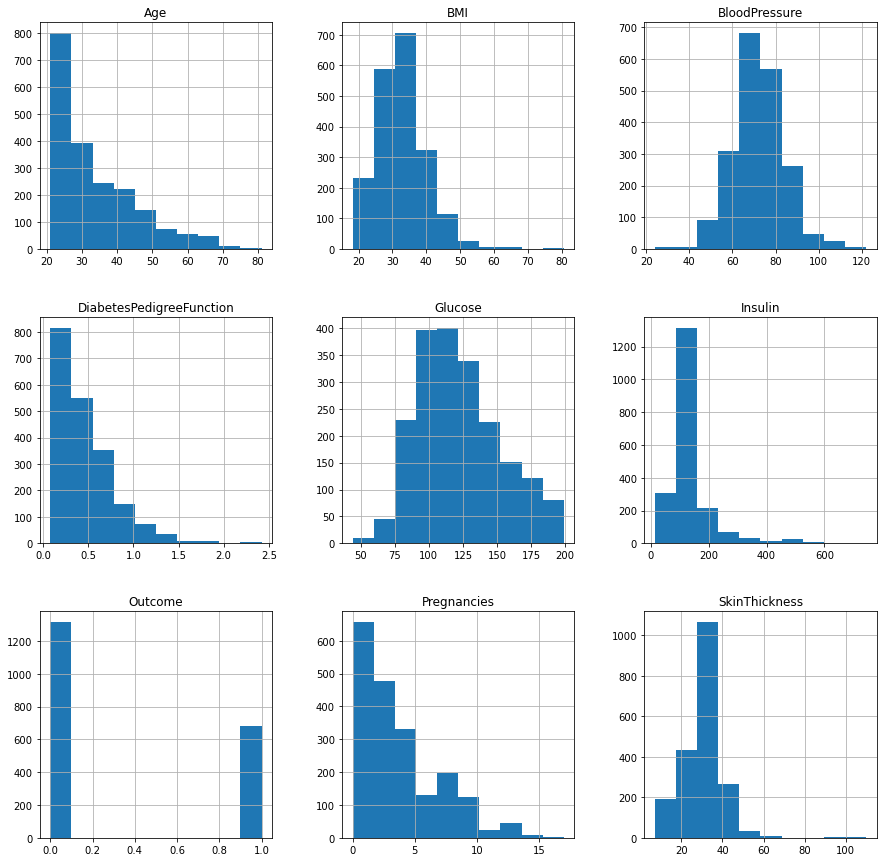

In [51]:
Db.hist(figsize = (15,15))

# Model Building

In [53]:
from sklearn.model_selection import train_test_split

X = Db.drop(columns='Outcome')
y = Db['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape)) 

X_train size: (1600, 8), X_test size: (400, 8)


In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
#Importing all model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [57]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy score of LogisticRegression() is:
0.79
[[243  29]
 [ 55  73]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       272
           1       0.72      0.57      0.63       128

    accuracy                           0.79       400
   macro avg       0.77      0.73      0.74       400
weighted avg       0.78      0.79      0.78       400

Accuracy score of GaussianNB() is:
0.765
[[228  44]
 [ 50  78]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       272
           1       0.64      0.61      0.62       128

    accuracy                           0.77       400
   macro avg       0.73      0.72      0.73       400
weighted avg       0.76      0.77      0.76       400

Accuracy score of SVC() is:
0.845
[[252  20]
 [ 42  86]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       272
           1       0.81      0.67      0.74  

In [58]:
#cross validate the model
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation:',score.std())
    print('*****************************************************************************************************************')
    print('\t\t')

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Model :  LogisticRegression()
Score : [0.77  0.73  0.79  0.775 0.78  0.795 0.765 0.685 0.79  0.8  ]
Mean Score : 0.768
Standard deviation: 0.033555923471125036
*****************************************************************************************************************
		
Model :  GaussianNB()
Score : [0.755 0.715 0.77  0.775 0.745 0.795 0.755 0.685 0.77  0.765]
Mean Score : 0.7529999999999999
Standard deviation: 0.03018277654557314
*****************************************************************************************************************
		
Model :  SVC()
Score : [0.74  0.73  0.79  0.78  0.78  0.815 0.76  0.675 0.825 0.77 ]
Mean Score : 0.7665000000000001
Standard deviation: 0.04141557677975762
*****************************************************************************************************************
		
Model :  DecisionTreeClassifier()
Score : [0.995 1.    0.975 1.    1.    1.    1.    0.97  1.    1.   ]
Mean Score : 0.994
Standard deviation: 0.010908712114635722
****

In [66]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth': [5,10]}
   
grid = GridSearchCV(DecisionTreeClassifier(), param_grid) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       272
           1       0.91      0.92      0.91       128

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.95       400



In [67]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'n_estimators': [10,15,20,50,100,200]}
   
grid = GridSearchCV(RandomForestClassifier(), param_grid) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [68]:
scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [61]:
scores = cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=10), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 89%


In [71]:
# Creating Random Forest Model
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [72]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[271,   1],
       [  3, 125]], dtype=int64)

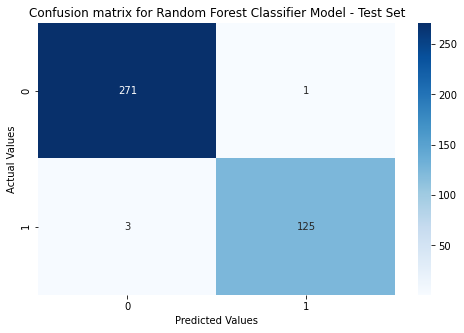

In [73]:
#Plotting the confusion matrix
plt.figure(figsize=(8,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [74]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 99.0%


In [75]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       0.99      0.98      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

